In [ ]:
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
%matplotlib inline

for plot over BEV image

input:
- track_file_path - path ของไฟล์ csv ผลลัพธ์ tracking
- trackBEV_filename - ชื่อ output ไฟล์ที่ต้องการ
- x0, y0 from Find_dst_src_for_Homogarphy
- rot_angle 'rad' from Find_dst_src_for_Homogarphy
- norma from Find_dst_src_for_Homogarphy

output:
- plot over BEV image
- trackBEV_filename.csv - path ที่อยู่ใน image coordinate 

In [ ]:
#input
track_file_path = 'Track_transfored/transformedTrack_path1.csv' 
trackBEV_all_filename = 'plotBEVTrack_path1_p.csv'
trackBEV_filtered_filename = 'plotBEVTrack_path1_p_filtered.csv'
trackBEV_prob_filename = "plotBEVTrack_path1_p_prob.csv"
bg_file_path = 'imgs/asoke_ref_n_plot.jpg'

problem_id_path = 'problem_id4.out'

#read input
problem_id = np.loadtxt(problem_id_path, delimiter=',')
problem_id = problem_id.tolist()


# #for asoke_ref_s.jpg
# x0 = 33.0116566684107
# y0 = 23.80980115108368
# rot_angle = -1.3741455498054422
# norma = 0.05751159698329391

#for asoke_ref_n3.jpg
x0 = 30.72637603060274
y0 = 28.349750260279876
rot_angle = -1.37500544436557
norma = 0.056586327864830095

In [ ]:
def transformDst(a):
    #rotate
    rad = -1*rot_angle

    for i in range(len(a)):
        x,y = a[i][0],a[i][1]
        a[i][0] = x*math.cos(rad) + y*math.sin(rad)
        a[i][1] = -x*math.sin(rad) + y*math.cos(rad)
    # print("rotate for "+str(rad)+" rad:")
    # print(a)

    for i in range(len(a)):
        a[i][0] += x0
        a[i][1] += y0
    # print("set origin at (0,0):")
    # print(a)

    #scale
    a = np.array(a)
    a = a / norma
    return(a)


def read_Track(track_file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(track_file_path)

    xy_list = []
    frame_list = []
    id_list = []
    class_list = []

    for index, row in df.iterrows():
        frame = row['frame']
        id = row['id']
        det_class = row['class']
        x = row['x']
        y = row['y']

        frame_list.append(frame)
        id_list.append(id)
        class_list.append(det_class)
        xy_list.append([x,y])

    return xy_list, frame_list, id_list, class_list

def read_Track_fillter_out_problem_id(track_file_path,problem_id):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(track_file_path)

    xy_list = []
    frame_list = []
    id_list = []
    class_list = []

    for index, row in df.iterrows():
        id = row['id']
        if id not in problem_id:

            frame = row['frame']
            det_class = row['class']
            x = row['x']
            y = row['y']

            frame_list.append(frame)
            id_list.append(id)
            class_list.append(det_class)
            xy_list.append([x,y])

    return xy_list, frame_list, id_list, class_list

def read_Track_only_problem_id(track_file_path,problem_id):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(track_file_path)

    xy_list = []
    frame_list = []
    id_list = []
    class_list = []

    for index, row in df.iterrows():
        id = row['id']
        if id in problem_id:

            frame = row['frame']
            det_class = row['class']
            x = row['x']
            y = row['y']

            frame_list.append(frame)
            id_list.append(id)
            class_list.append(det_class)
            xy_list.append([x,y])

    return xy_list, frame_list, id_list, class_list

def write_csv(frame_list, id_list, transformed_xy,trackBEV_filename):
    # Create a pandas DataFrame from the data
    df = pd.DataFrame({
        'frame': frame_list,
        'id': id_list,
        'class': class_list,
        'x': transformed_xy[:,0],
        'y': transformed_xy[:,1]
    })

    # Write the DataFrame to a CSV file
    df.to_csv(trackBEV_filename, index=False)




In [ ]:
#Read tracking csv file to list
xy_list, frame_list, id_list, class_list = read_Track(track_file_path)

#Transform point
transformed_xy = transformDst(xy_list)

#write result to csv
write_csv(frame_list, id_list, transformed_xy,trackBEV_all_filename)



In [ ]:
#Read tracking csv file to list
xy_list, frame_list, id_list, class_list = read_Track_fillter_out_problem_id(track_file_path,problem_id)

#Transform point
transformed_xy = transformDst(xy_list)

#write result to csv
write_csv(frame_list, id_list, transformed_xy,trackBEV_filtered_filename)

In [ ]:
#Read tracking csv file to list
xy_list, frame_list, id_list, class_list = read_Track_only_problem_id(track_file_path,problem_id)

#Transform point
transformed_xy = transformDst(xy_list)

#write result to csv
write_csv(frame_list, id_list, transformed_xy,trackBEV_prob_filename)

## Plot

In [ ]:
#plot code by ME15

#for only interested track 
def csv_to_list_id(df,interest_id):
  sort_id = df.sort_values(["id","frame"])
  plotting = [[]]
  max_id = sort_id['id'].max()
  for i in interest_id: 
    id1 = sort_id[sort_id["id"] == i]
    id1 = id1.reset_index()
    x_array = []
    y_array = []
    for j in range(0, len(id1)):
      x_center = id1.iloc[j]['x']
      y_center = id1.iloc[j]['y']
      x_array.append(x_center)
      y_array.append(y_center)
    plotting.append([x_array,y_array])
  return plotting

def csv_to_list(df):
  sort_id = df.sort_values(["id","frame"])
  plotting = [[]]
  max_id = sort_id['id'].max()
  for i in range(1, max_id+1):
    id1 = sort_id[sort_id["id"] == i]
    id1 = id1.reset_index()
    x_array = []
    y_array = []
    for j in range(0, len(id1)):
      x_center = id1.iloc[j]['x']
      y_center = id1.iloc[j]['y']
      x_array.append(x_center)
      y_array.append(y_center)
    plotting.append([x_array,y_array])
  return plotting

def traj_plot_all(plotdata):
  color = iter(cm.rainbow(np.linspace(0,1,len(plotdata)+2)))
  bg = cv.imread(bg_file_path)
  bg_rgb = cv.cvtColor(bg, cv.COLOR_BGR2RGB)
  plt.imshow(bg_rgb,alpha=0.5)
  x_min=0;x_max=bg.shape[1]
  y_min=bg.shape[0];y_max=0
  plt.title("overlay plot")
  plt.xlim([x_min, x_max])
  plt.ylim([y_min, y_max])
  plt.xlabel('x')
  plt.ylabel('y')
  for i in range(1, len(plotdata)):
    c = next(color)
    plt.plot(plotdata[i][0],plotdata[i][1], color=c, marker="o", linewidth=1, ms=1)
    if (len(plotdata[i][0]) != 0):
      plt.plot(plotdata[i][0][-1],plotdata[i][1][-1], color=c, marker="x", linewidth=1, ms=8)

In [ ]:
df1 =  pd.read_csv('plotBEVTrack_traj1_p_filtered.csv')
df2 =  pd.read_csv('plotBEVTrack_traj2_p_filtered.csv')
df3 =  pd.read_csv('plotBEVTrack_traj3_p_filtered.csv')
df4 =  pd.read_csv('plotBEVTrack_traj4_p_filtered.csv')
plotting1 = csv_to_list(df1)
plotting2 = csv_to_list(df2)
plotting3 = csv_to_list(df3)
plotting4 = csv_to_list(df4)

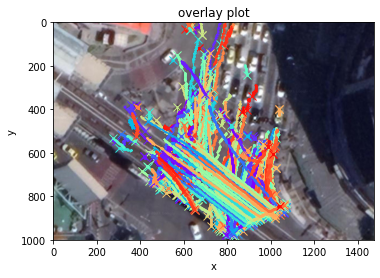

In [ ]:
traj_plot_all(plotting1)
traj_plot_all(plotting2)
traj_plot_all(plotting3)
traj_plot_all(plotting4)
traj_plot_all(plotting1)

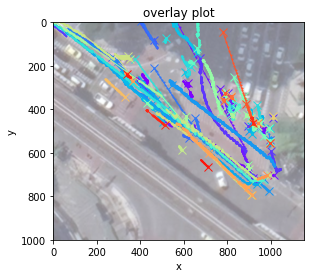

In [ ]:
df_all = pd.read_csv(trackBEV_all_filename)
plotting = csv_to_list(df_all)
traj_plot_all(plotting)


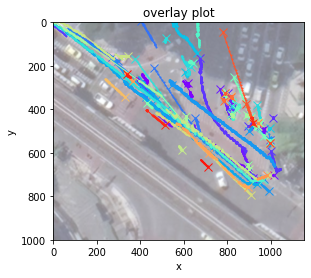

In [ ]:
df_filter = pd.read_csv(trackBEV_filtered_filename)
plotting = csv_to_list(df_filter)
traj_plot_all(plotting)

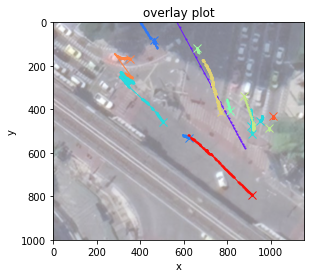

In [ ]:
df_prob = pd.read_csv(trackBEV_prob_filename)
plotting = csv_to_list(df_prob)
traj_plot_all(plotting)


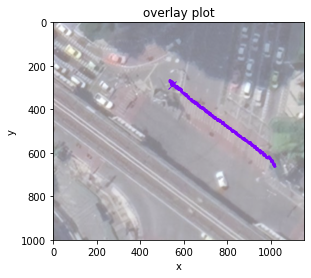

In [12]:
plotting = csv_to_list_id(df_filter,[49])
traj_plot_all(plotting)


get number of path

In [ ]:
print(df_all.id.nunique())
print(df_filter.id.nunique())
print(df_prob.id.nunique())

115
98
17
